In [46]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import permutations

cities = ["Berlin","Dusseldorf","Hamburg","Munich","Berlin"]

def make_tsp_tree(cities):
    """
    Create all Hamilton paths from start to end city from a list of cities.
    Creates a directed prefix tree from a list of the created paths. 
    Remove the root node and nil node.
    """
    start, *rest, end = cities
    paths = [(start, *path, end) for path in permutations(rest)]
    
    #Creates a directed prefix from a list of paths
    G = nx.prefix_tree(paths)
    
    #remove synthetic root node (None) and nil node (NIL)
    G.remove_nodes_from([0, -1])
    
    return G

#Get graph object with all Hamilton paths
G = make_tsp_tree(cities)

#Create node positions for G using Graphviz.
#Available layouts: https://graphviz.org/docs/layouts/
#dot gives hierarchical or layered drawings of directed graphs
#possible layouts: dot, neato, twopi, circo, fdp, osage, patchwork, sfdp
# positions = nx.nx_agraph.graphviz_layout(G, "dot")

# plt.figure(figsize = (12,8))

# #Draw networkx Graph object with labels off
# nx.draw_networkx(G,
#                  pos = positions,
#                  node_color = "mistyrose",
#                  with_labels= False)

# #Draw NetworkX Graph object with defined labels for each node
# nx.draw_networkx_labels(G,
#                         pos = positions,
#                         labels = dict(G.nodes(data = "source")))

# plt.title("Hamilton paths for Berlin, Hamburg, Dusseldorf and Munich.\n Start and end at Berlin.")
# plt.axis("off")
# plt.show()

In [47]:
capitals = ["Berlin", "Bremen", "Dresden", "Dusseldorf",
            "Erfurt", "Hamburg", "Hannover", "Kiel",
            "Magdeburg", "Mainz", "Munich", "Potsdam",   "Saarbrucken", "Schwerin", "Stuttgart", "Wiesbaden"]

In [48]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="app")

def get_lat_lon(city):
    location = geolocator.geocode(city)
    return location.longitude, location.latitude

coordinates = [get_lat_lon(city) for city in capitals]

  Using cached pygraphviz-1.13.tar.gz (104 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pygraphviz


  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [50 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-310
      creating build\lib.win-amd64-cpython-310\pygraphviz
      copying pygraphviz\agraph.py -> build\lib.win-amd64-cpython-310\pygraphviz
      copying pygraphviz\graphviz.py -> build\lib.win-amd64-cpython-310\pygraphviz
      copying pygraphviz\scraper.py -> build\lib.win-amd64-cpython-310\pygraphviz
      copying pygraphviz\testing.py -> build\lib.win-amd64-cpython-310\pygraphviz
      copying pygraphviz\__init__.py -> build\lib.win-amd64-cpython-310\pygraphviz
      creating build\lib.win-amd64-cpython-310\pygraphviz\tests
      copying pygraphviz\tests\test_attribute_defaults.py -> build\lib.win-amd64-cpython-310\pygraphviz\tests
      copying pygraphviz\tests\test_clear.py -> build\lib.

In [49]:
print(coordinates)
# coordinates = [(52.5170365, 13.3888599), (53.0758196, 8.8071646), (51.0493286, 13.7381437), (51.2254018, 6.7763137), (50.9777974, 11.0287364), (53.550341, 10.000654), (52.3744779, 9.7385532), (54.3227085, 10.135555), (52.1315889, 11.6399609), (50.0012314, 8.2762513), (48.1371079, 11.5753822), (52.4009309, 13.0591397), (49.234362, 6.996379), (53.6288297, 11.4148038), (48.7784485, 9.1800132), (50.0820384, 8.2416556)]

[(13.3888599, 52.5170365), (8.8071646, 53.0758196), (13.7381437, 51.0493286), (6.7763137, 51.2254018), (11.0287364, 50.9777974), (10.000654, 53.550341), (9.7385532, 52.3744779), (10.135555, 54.3227085), (11.6399609, 52.1315889), (8.2762513, 50.0012314), (11.5753822, 48.1371079), (13.0591397, 52.4009309), (6.996379, 49.234362), (11.4148038, 53.6288297), (9.1800132, 48.7784485), (8.2416556, 50.0820384)]


<AxesSubplot:>

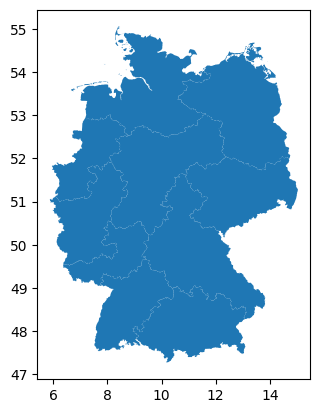

In [50]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Make sure you read postal codes as strings, otherwise 
# the postal code 01110 will be parsed as the number 1110. 
germany = gpd.read_file('data\plz-1stellig.shp', dtype={'plz': str})

germany.plot()

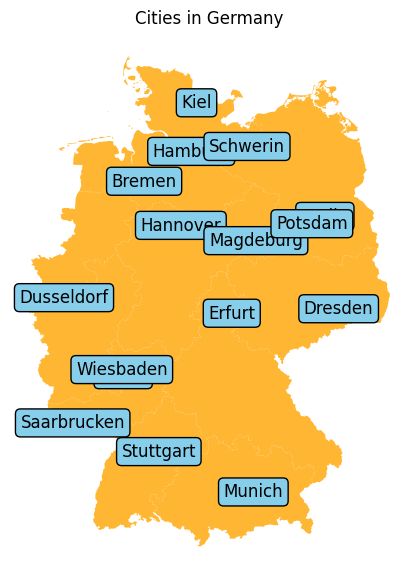

In [56]:
import numpy as np
G = nx.Graph()
nodes = np.arange(0,len(capitals))
G.add_nodes_from(nodes)
positions = {node:coordinate for node, coordinate in zip(nodes, coordinates)}
labels = {node:city for node, city in zip(nodes, capitals)}
all_cities = {city:corrd for city, corrd in zip(capitals, coordinates)}
fig, ax = plt.subplots(figsize=(10,7))
germany.plot(ax=ax, color='orange', alpha=0.8)
nx.draw_networkx(G, pos=positions,labels=labels, ax=ax,
                       bbox=dict(facecolor='skyblue', boxstyle='round',pad=0.3,ec='black'))
plt.title("Cities in Germany")
plt.axis('off')
plt.show()

In [58]:
for i in nodes:
     for j in nodes:
          if i!=j:
               G.add_edge(i, j)

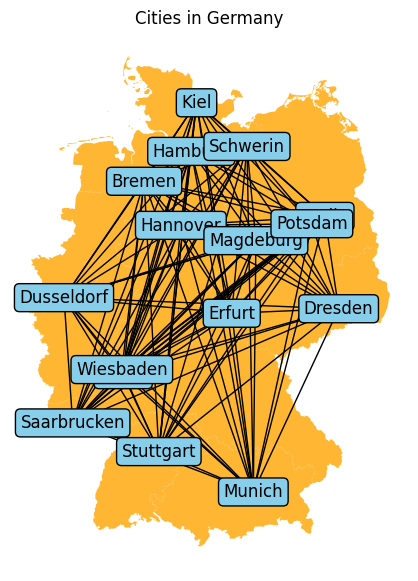

In [59]:
fig, ax = plt.subplots(figsize=(10,7))
germany.plot(ax=ax, color='orange', alpha=0.8)
nx.draw_networkx(G, pos=positions,labels=labels, ax=ax,
                       bbox=dict(facecolor='skyblue', boxstyle='round',pad=0.3,ec='black'))
plt.title("Cities in Germany")
plt.axis('off')
plt.show()

In [62]:
H = G.copy()
import math
#Calculating the distances between the nodes as edge's weight.
for i in range(len(positions)):
     for j in range(i + 1, len(positions)):

        #Multidimensional Euclidean distan
          dist = math.hypot(positions[i][0] - positions[j][0], positions[i][1] - positions[j][1])
          dist = dist
          G.add_edge(i, j, weight=dist)

In [64]:
import networkx.algorithms.approximation as nx_app
cycle = nx_app.christofides(G, weight="weight")
edge_list = list(nx.utils.pairwise(cycle))

In [65]:
labels = {node:city for node, city in zip(nodes, capitals)}
tsp_cycle = [labels[val] for val in cycle]

(5.4075345200000005, 15.50071168, 46.880682799999995, 55.448112)

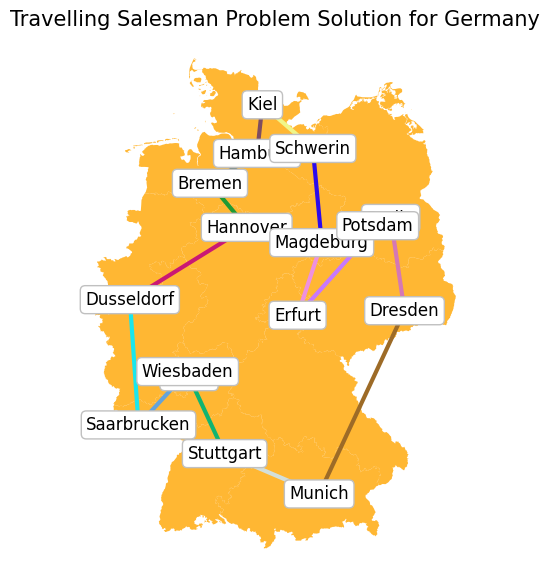

In [70]:
fig, ax = plt.subplots(figsize=(10,7))
import random
get_colors = lambda n: list(map(lambda i: '#' +'%06x' % random.randint(0, 0xffffff),range(n)))
germany.plot(ax=ax, color='orange', alpha=0.8)

nx.draw_networkx(G, pos = positions, labels = labels, 
 edgelist=edge_list, edge_color=get_colors(16), width=3,
 node_color = "snow", node_shape = "s", node_size = 300,
 bbox = dict(facecolor = "#ffffff", boxstyle = "round",ec = "silver"),
 ax = ax)
plt.title("Travelling Salesman Problem Solution for Germany", fontsize = 15)
plt.axis("off")

In [71]:
import folium

folium_coordinates = []
for x,y in coordinates:
    folium_coordinates.append([y,x])
    
route = []
for stop in cycle:
    route.append(folium_coordinates[stop])
    
m1 = folium.Map(location = [51, 10],   #latitude (N), longitude (E)
                tiles = "OpenStreetMap", 
                zoom_start= 6
                )

for coordinate, capital in zip(folium_coordinates, capitals):
    folium.Marker(location = coordinate,
                 popup = capital).add_to(m1)
    
folium.PolyLine(route).add_to(m1)
    
m1.save("germany tsp.html")

m1